In [1]:
import matplotlib.pyplot as plt
import numpy as np
from orbsim.r3b_2d.analyticals import *
from orbsim.r3b_2d.simulators import launch_sim
from orbsim.plotting import orbitplot2d, orbitplot_non_inertial,getting_things_readyg_things_ready
from orbsim import *
from orbsim.r3b_2d import *
import operator

In [2]:
N=4
psis=[]
paths=[]
examples=[
#          ["hohmann", [-2.086814820119193, -0.000122173047640, 3.111181716545691],5],
         ["long_leto",[3.794182930145708, 0.023901745288554, 3.090702702702703],200],
#          ["short_leto",[-0.138042744751570, -0.144259374836607, 3.127288444444444],41],
#          ["3-day_hohmann",[-2.272183066647597, -0.075821466029764, 3.135519748743719],3],
#          ["1-day_hohmann",[-2.277654673852600, 0.047996554429844, 3.810000000000000],1]
]#[title, psi, duration]
for title, psi, duration in examples:
    for i in range(N):
        permute_psi = np.array(psi)+np.array([i*1e-4,i*1e-4,i*1e-4])
        path = launch_sim(permute_psi, max_iter=1e7, duration=duration)
        psis.append(permute_psi)
        paths.append(path) 


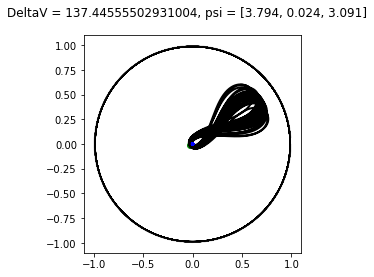

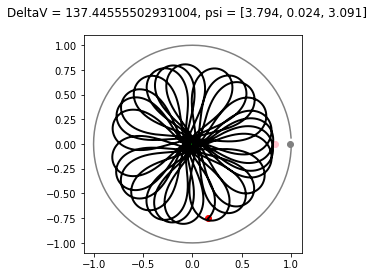

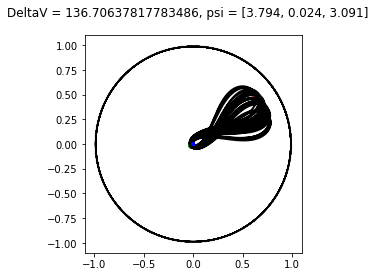

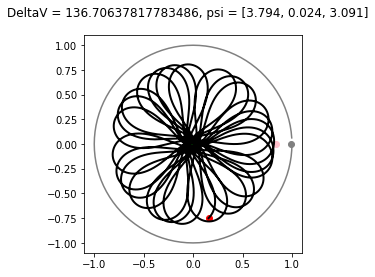

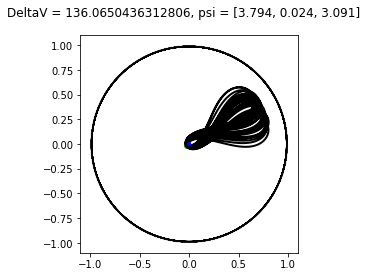

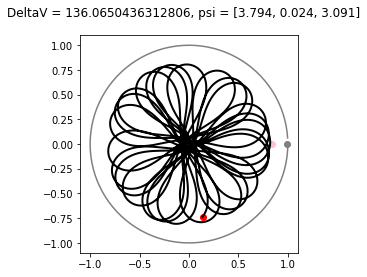

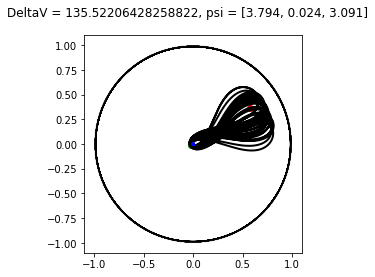

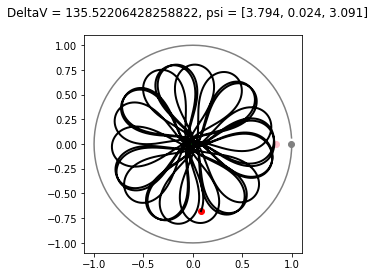

In [3]:
for i in range(len(paths)):
    orbitplot2d(paths[i],psis[i],filepath="./lyapunov_figs/trajectories",title="{title}_{i}")
    orbitplot_non_inertial(paths[i],psis[i],filepath="./lyapunov_figs/trajectories",title="{title}_{i}")

In [4]:
lyaps=[]
for a in range(N):
    for b in range(N):
        print(f"comparing {a} and {b}")
        if a>=b:
            continue
        lyap=[]
        _a=np.array(paths[a][1]).T
        _b=np.array(paths[b][1]).T
        xas=_a[0]
        yas=_a[1]
        xbs=_b[0]
        ybs=_b[1]
#         hs=(_a[4],_b[4])
        ts=(_a[5],_b[5])
        print(f"length of the trajectory coordinate arrays: {a}: {len(xas)}, {b}: {len(xbs)}")
        
#         ts=[None,None]
#         for l in range(len(hs)):
#             idxs=[]
#             tally=0
#             for i in range(len(hs[l])): # each time step h, check whether the little tally has reached our threshold.
#                 h=hs[l][i]              # if it has, take that index as a time step
#                 tally+=h
#                 if tally>=1.5e-5:
#                     idxs.append(i)
#                     tally=0
#             ts[l] = idxs
            
        _,min_ts = min([(len(x), list(x)) for x in ts])
        print(f"time steps standardized: comparing at {len(min_ts)} points on the trajectory. Last point will be at {max(min_ts)}")
        for idx in range(len(min_ts)):
#             idx=min_ts[i]
            lyap.append(sqrt((xas[idx]-xbs[idx])**2+(yas[idx]-ybs[idx])**2))
        lyaps.append(lyap)
print(len(lyaps))

comparing 0 and 0
comparing 0 and 1
length of the trajectory coordinate arrays: 0: 6446445, 1: 6455729
time steps standardized: comparing at 6446445 points on the trajectory. Last point will be at 45.9935986651452
comparing 0 and 2
length of the trajectory coordinate arrays: 0: 6446445, 2: 6457647
time steps standardized: comparing at 6446445 points on the trajectory. Last point will be at 45.9935986651452
comparing 0 and 3
length of the trajectory coordinate arrays: 0: 6446445, 3: 6442918
time steps standardized: comparing at 6442918 points on the trajectory. Last point will be at 45.993598711246776
comparing 1 and 0
comparing 1 and 1
comparing 1 and 2
length of the trajectory coordinate arrays: 1: 6455729, 2: 6457647
time steps standardized: comparing at 6455729 points on the trajectory. Last point will be at 45.99362853861586
comparing 1 and 3
length of the trajectory coordinate arrays: 1: 6455729, 3: 6442918
time steps standardized: comparing at 6442918 points on the trajectory. La

In [5]:
loglyaps=[]
for i in range(len(lyaps)):
    lyap=lyaps[i][1:]
    loglyap=[np.log(x) for x in lyap]
    loglyaps.append(loglyap)

In [6]:
def find_segments(lyap):
    segments=[]
    prev_l = -1e8
    rising = True
    segment=[0]
    for i,l in enumerate(lyap):
        if rising:
            if l<prev_l:
                rising = False
                segment.append(i)
        else:
            if l>prev_l:
                rising = True
                segments.append(segment)
                segment=[i]
        prev_l = l
    if len(segment) == 1:
        segment.append(len(lyap))
    segments.append(segment)
    return segments

In [7]:
from scipy import stats
def compute_slope(lyap, filepath=".", title="derp"):
    segments=find_segments(lyap)
    plt.plot(range(len(lyap)),lyap,color='grey',alpha=0.5)
    slopes=[]
    for lb, ub in [[int(x),int(y)] for [x,y] in segments]:
        if ub-lb < 100:
            continue
        if ub>len(lyap):
            break
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(lb,ub),lyap[lb:ub])
        slopes.append(slope)
        #print(slope, intercept)
        line=slope*range(lb,ub)+intercept
        plt.plot([lb,ub],[line[0],line[-1]],color='darkred')
        plt.plot(range(lb,ub),lyap[lb:ub],color='teal')
    mean_slope = np.mean(slopes)
    plt.suptitle(f"mean slope = {mean_slope}")
    plt.savefig(f"{filepath}/{title}.pdf")
    plt.clf()
    return mean_slope

In [8]:
slopes=[]
for i, loglyap in enumerate(loglyaps):
    slopes.append(compute_slope(loglyap,filepath="lyapunov_figs/slopes",title=f"{title}_{i}"))
print(f"mean slope = {np.mean(slopes)}")
    

mean slope = 3.590640863481183e-05


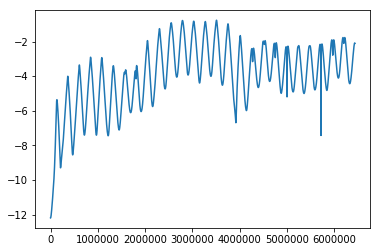

In [10]:
lyap=lyaps[2][1:]
loglyap=[np.log(x) for x in lyap]
plt.plot(range(len(loglyap)),loglyap)

In [100]:
slope, intercept, r_value, p_value, std_err = stats.linregress(range(lb,ub),loglyap[lb:ub])
print(slope, intercept)

3.040160021068095e-06 -4.150509459758794


In [75]:
line=slope*range(lb,ub)+intercept

In [31]:
hs = np.array(paths[0][1]).T[4]

In [32]:
min(hs)

6.778256920031252e-08

In [33]:
max(hs)

5.798294330541472e-05

In [36]:
np.std(hs)

1.0882626399622566e-05

In [38]:
np.mean(hs)

7.04610385050155e-06

In [39]:
np.median(hs)

1.4170823204431882e-06

In [11]:
for i,lyap in enumerate(lyaps):
    print(i)
    print(f"max_dist={max(lyap)}\nmin_dist={min(lyap[1:])}\nmean_dist={np.mean(lyap)}\n")

0
max_dist=0.22066456080414681
min_dist=1.698076267163853e-06
mean_dist=0.03069008199027767

1
max_dist=0.3361942995790322
min_dist=3.396153190746294e-06
mean_dist=0.052128642235248865

2
max_dist=0.46263197877697293
min_dist=5.094228851045785e-06
mean_dist=0.05862640789126122

3
max_dist=0.18417964934186015
min_dist=1.6980765870977226e-06
mean_dist=0.022360363891778628

4
max_dist=0.3523035474515596
min_dist=3.3961522611417697e-06
mean_dist=0.0408686303133852

5
max_dist=0.2224322258850193
min_dist=1.6980753888654565e-06
mean_dist=0.029016250363473158



# Experiments

In [345]:
import numpy as np
import matplotlib.pyplot as plt

In [346]:
nIndividuals=5
nJitter=60
init_sigma = 0.01  # jitter spread
init_alpha = 0.03  # learningrate
psis = np.array([[float(x),float(x),float(x)] for x in range(nIndividuals)])

sigma = np.ones(nIndividuals) * init_sigma
alpha = np.ones(nIndividuals) * init_alpha
jitter = np.random.rand(nJitter,nIndividuals, 3)

jitter[0] *= 0  # Make sure all set individual psis are evaluated without jitter
points = psis + jitter

jitter=jitter.reshape(nIndividuals,nJitter,3)
jitter = np.array([sigma[idx] * jitt for idx, jitt in enumerate(jitter)])
successes = np.zeros(nIndividuals * nJitter, dtype=bool)
scores = np.ones(nIndividuals * nJitter)

scores=scores.reshape(nIndividuals,nJitter)
steps=np.zeros([nIndividuals,3])
for idx, score in enumerate(scores):
    if not successes[idx]:
        # punish paths that do not hit planet
        scores[idx] = ((score + 1) * 10) ** 2

    steps[idx]=np.dot(scores[idx], jitter[idx])*alpha[idx]


In [347]:
psi_scores = scores.T[0]
print(psi_scores)
for idx, score in enumerate(psi_scores):
    new_sigma=init_sigma * score
    new_alpha=init_alpha * score
    sigma[idx] = new_sigma
    alpha[idx] = new_alpha
    
psis += steps

[400. 400. 400. 400. 400.]


In [348]:
x=np.array([np.array(x).shape for x in [steps,psi_scores,psis]])
print(x)

[(5, 3) (5,) (5, 3)]


In [349]:
np.dot(np.array(range(nJitter)),jitter[4])

array([8.93566073, 9.70938133, 9.95894893])

In [364]:
x=4
print(psis[x],psis.shape)
print(points[x],points.shape)
print(jitter[x],jitter.shape)
print(scores[x],scores.shape)
print(steps[x],steps.shape)

[7.6093638  8.06617431 8.01529604] (5, 3)
[[0.35358936 0.73625528 0.20029597]
 [1.50116374 1.8388877  1.2422327 ]
 [2.55550609 2.78762511 2.00372923]
 [3.32269473 3.69454578 3.80412339]
 [4.66506177 4.28811951 4.85086067]] (60, 5, 3)
[[0.00549487 0.00229443 0.00875312]
 [0.00367065 0.0068289  0.00172641]
 [0.00381548 0.00641021 0.00382176]
 [0.00308342 0.00727735 0.0038963 ]
 [0.00836775 0.00905164 0.00099839]
 [0.00298417 0.00740889 0.00802219]
 [0.00030912 0.00745694 0.00935629]
 [0.00086593 0.00466031 0.00585753]
 [0.00738115 0.00541195 0.00920459]
 [0.00029315 0.00249369 0.00182915]
 [0.00652067 0.00173615 0.00446643]
 [0.00038638 0.00849032 0.00611412]
 [0.00949228 0.00331047 0.00219493]
 [0.00100738 0.00749475 0.00824788]
 [0.00249899 0.00697659 0.00900797]
 [0.0004923  0.00896995 0.00983745]
 [0.00919542 0.00432211 0.00623335]
 [0.00431793 0.00795334 0.00290087]
 [0.0060913  0.00940965 0.00254117]
 [0.00661484 0.0089527  0.00035848]
 [0.0054722  0.00411143 0.00457278]
 [0.009684

In [351]:
print(steps)

[[3.12347628 3.1147399  3.67549024]
 [4.2384308  3.8404627  3.52123212]
 [3.44228205 3.95527599 3.9901878 ]
 [3.35031559 3.62643875 3.49749328]
 [3.6093638  4.06617431 4.01529604]]


In [344]:
psis

array([[0.10653345, 0.04179565, 0.01266859],
       [1.26914732, 1.41913899, 1.46408696],
       [2.43277499, 2.48841131, 2.32785452],
       [3.44226624, 3.22200589, 3.31133373],
       [4.4928143 , 4.26590787, 4.24181361]])